In [ ]:
# Importation des bibliothèques nécessaires pour l'analyse de données et le machine learning
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

# Importation des outils de machine learning de scikit-learn
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  #

In [ ]:
# Chargement et exploration initiale des données
data = pd.read_csv("Fifa 23 Players Data.csv")

# Affichage des informations générales sur le dataset
print(data.shape)  
print("-------------------------------")
print(data.info())  
print("-------------------------------")
print(data.head())  
print("-------------------------------")
print(data.describe())  
print("-------------------------------")
print(data.dtypes)  

(18539, 89)
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null 

In [ ]:
# Sélection des caractéristiques (features) et de la variable cible
features = ["Age", "Overall", "Potential", "Wage(in Euro)", "International Reputation"]

X = data[features]  
y = data["Value(in Euro)"]  

In [ ]:
# Nettoyage des données
data = data.drop_duplicates()  
numeric_cols = X.select_dtypes(include=[np.number]).columns  
X = X.fillna(X.median())  
y = y.fillna(y.median())  

In [ ]:
# Visualisation des données

# Scatter plot : relation entre la note globale et la valeur du joueur
plt.figure()
sns.scatterplot(x=data["Overall"], y=data["Value(in Euro)"] / 1000000)
plt.title("Note globale vs Valeur du joueur")
plt.show()

# Heatmap des corrélations entre les variables
plt.figure(figsize=(8,6))
sns.heatmap(data[features + ["Value(in Euro)"]].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélations")
plt.show()

In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création et entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)  

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
# Évaluation du modèle avec validation croisée
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  
print(f"R^2 moyen avec Cross validation : {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

R² moyen avec Cross validation : 0.97 (+/- 0.03)


In [ ]:
# Prédictions sur l'ensemble de test et évaluation des performances
y_pred = model.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 887777333063.5121
R^2 Score: 0.9820348105867484


Exemples de prédictions :
       Valeur réelle (en M€)  Valeur prédite (en M€)
10157                   1.50                1.540224
3617                    1.90                1.587000
4894                    2.10                1.907600
2315                    8.00                8.295000
2177                    5.00                4.799000
9187                    0.55                0.597660
2518                    2.50                2.559133
15344                   0.60                0.575109
15355                   0.55                0.588113
9305                    1.60                1.672960


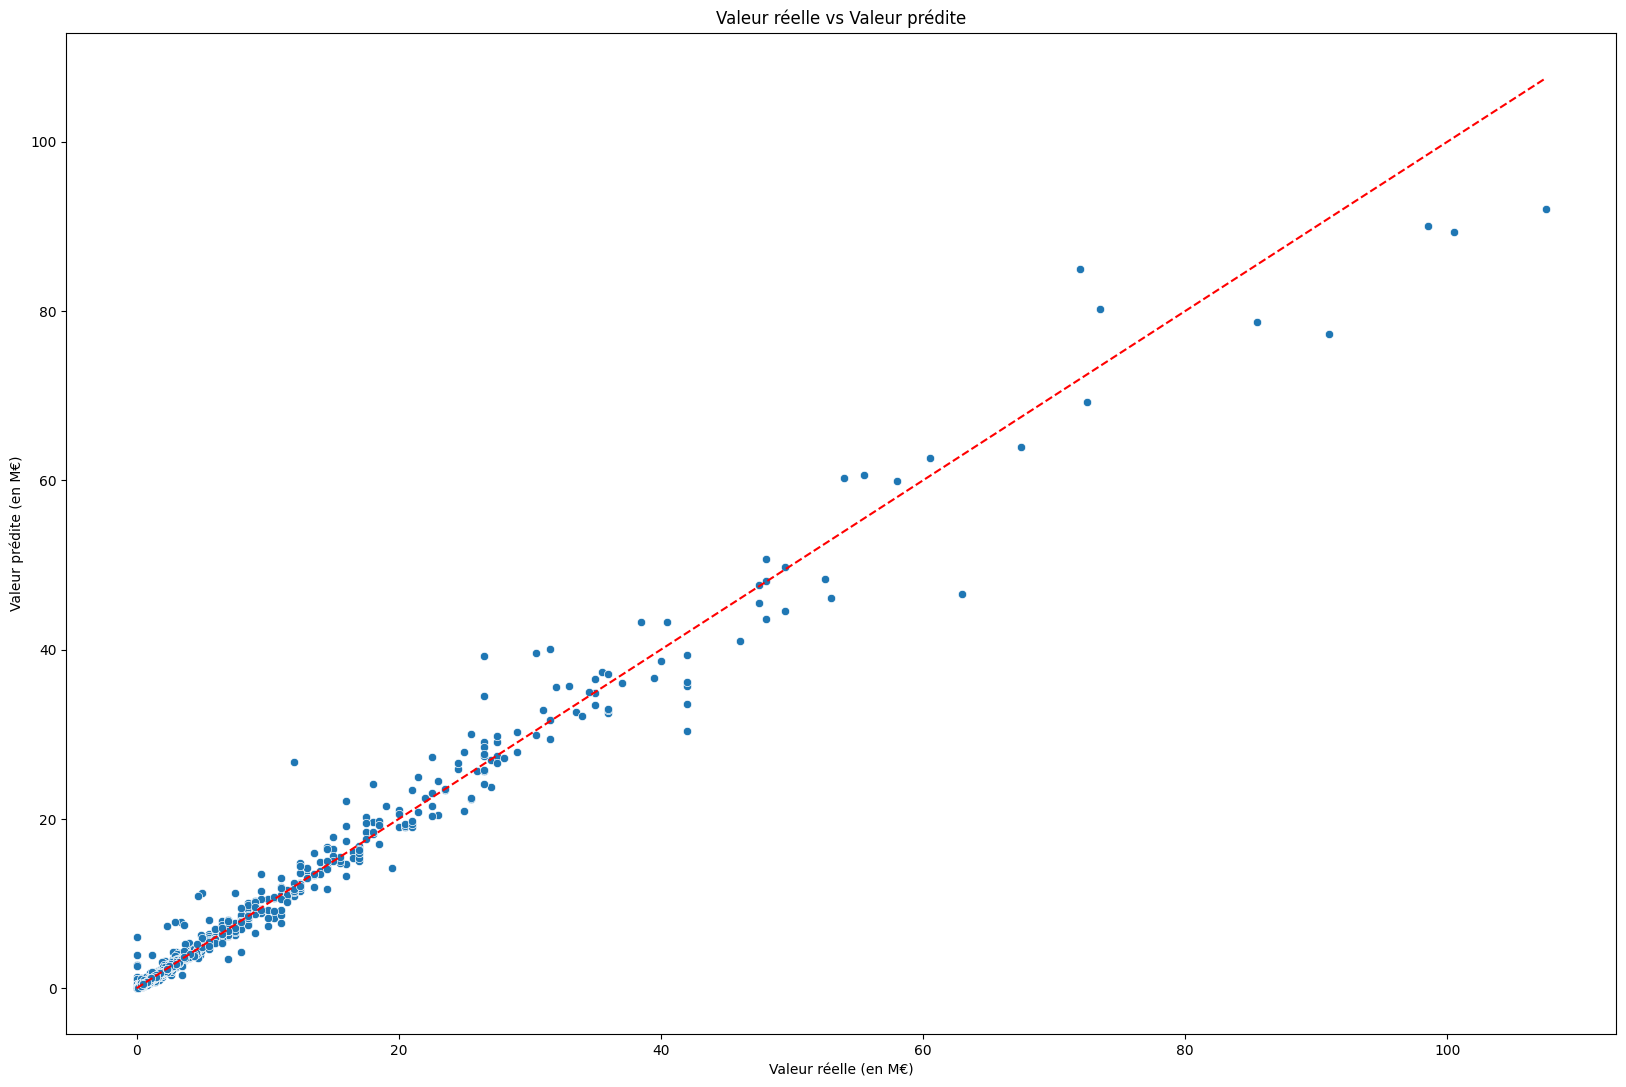

In [ ]:
# Analyse des résultats et visualisation finale

predictions_df = pd.DataFrame({
    'Valeur réelle (en M€)': y_test / 1_000_000,  
    'Valeur prédite (en M€)': y_pred / 1_000_000,
})

# Affichage d'exemples de prédictions
print("Exemples de prédictions :")
print(predictions_df.head(10))

# Visualisation : valeurs réelles vs prédites
plt.figure(figsize=(20,13))
sns.scatterplot(x=y_test / 1_000_000, y=y_pred / 1_000_000)
plt.plot([0, max(y_test) / 1_000_000], [0, max(y_test) / 1_000_000], color='red', linestyle='--')  
plt.xlabel("Valeur réelle (en M€)")
plt.ylabel("Valeur prédite (en M€)")
plt.title("Valeur réelle vs Valeur prédite")
plt.show()